In [1]:
import matplotlib.pyplot as plt
# 设置中文字体为黑体（SimHei），解决中文乱码
plt.rcParams['font.sans-serif'] = ['SimHei']  
# 解决负号 '-' 显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

  Feature  Importance
3      f3    0.636502
2      f2    0.457520
1      f1    0.433113
0      f0    0.376988


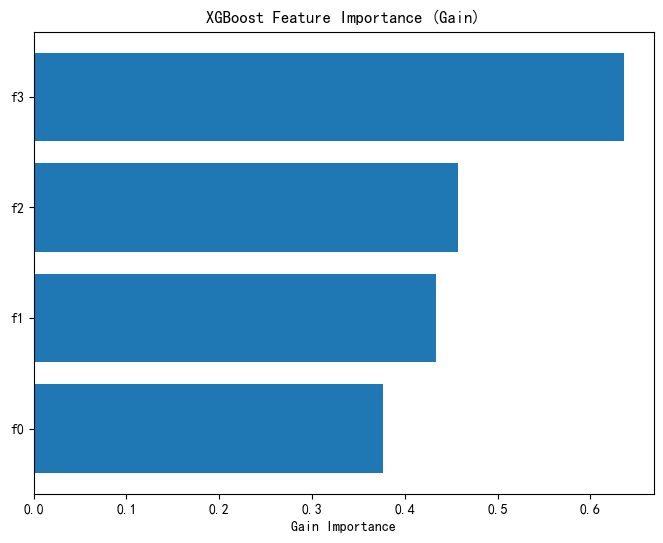

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import pandas as pd
import numpy as np

# 使用刚才的数据再次训练尝试

# 1. 读取处理后的数据
df = pd.read_csv('data_processed_std.csv')


# df['孕周_sq'] = df['检测孕周_周数'] ** 2
# df['BMI_sq'] = df['孕妇BMI'] ** 2
# df['孕周xBMI'] = df['检测孕周_周数'] * df['孕妇BMI']
# df['年龄x孕周'] = df['年龄'] * df['检测孕周_周数']

# 手动设置 y 和 x 的列
y_col = 'Y染色体浓度'
# x_cols = ['检测孕周_周数','年龄','孕妇BMI','末次月经','孕周_sq','BMI_sq','孕周xBMI','年龄x孕周']
x_cols = ['检测孕周_周数','年龄','孕妇BMI','末次月经']


# 根据给定的xy列，分割数据集
X = df[x_cols].values
y = df[y_col].values

# 2. 拆分训练测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 使用xgboost

# 设置参数
param = {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}

xgb = XGBRegressor(**param)

xgb.fit(X_train, y_train)
# 获取特征重要性（按 gain 排序）
importance_dict = xgb.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Importance': list(importance_dict.values())
}).sort_values(by='Importance', ascending=False)
print(importance_df)
# 可视化
plt.figure(figsize=(8,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Gain Importance")
plt.title("XGBoost Feature Importance (Gain)")
plt.show()


In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
y_pred = xgb.predict(X_test)
# 计算r2_score
_r2_score = r2_score(y_test, y_pred)
print('r2_score:', _r2_score)

# 计算MAE
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)



r2_score: 0.45137125993364346
MAE: 0.5129233489804375


In [25]:
# 分析xgboost对于训练集的效果
y_train_pred = xgb.predict(X_train)
print("训练集的R2得分:", r2_score(y_train, y_train_pred))


训练集的R2得分: 0.9675871709522598
